Ce Notebook illustre comment j'ai programmé un cube en 3D. Mes besoins sont les suivants : 
* Programmer un cube de façon à pouvoir interagir avec ses 6 faces
* Pouvoir manipuler ce cube dans l'espace (rotation, translations)
* Pouvoir visualiser le résultat

Les packages suivants sont utilisés pour :
- numpy : créer des structures de données (matrices, vecteurs)
- matplotlib : visualiser le résultat

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
import vtk

ModuleNotFoundError: No module named 'vtk'

La fonction cubeViewer prend, en entrée, les coordonnées des sommets du cube pour les représenter dans l'espace.

In [2]:
def cubeViewer(vertex):
    # Visualize the cube

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(vertex[:, 0], vertex[:, 1], vertex[:, 2])

    plt.show()
    return

In [3]:
center = np.array([0, 0, 0, 0])  # coordonnées du centre
a = 2  # longueur d'un demi-côté du cube

vertex = np.zeros([8, 4])  # initialiser sommets

# p0 à p3 sont les vecteurs allant du centre aux sommets du cube
p0 = np.array([a, a, a, 0]) 
p1 = np.array([a, -a, a, 0])
p2 = np.array([a, a, -a, 0])
p3 = np.array([a, -a, -a, 0])

vertex[0] = center + p0
vertex[1] = center - p0
vertex[2] = center + p1
vertex[3] = center - p1
vertex[4] = center + p2
vertex[5] = center - p2
vertex[6] = center + p3
vertex[7] = center - p3

vertex[0, -1] = 1
vertex[1, -1] = 1
vertex[2, -1] = 1
vertex[3, -1] = 1
vertex[4, -1] = 1
vertex[5, -1] = 1
vertex[6, -1] = 1
vertex[7, -1] = 1

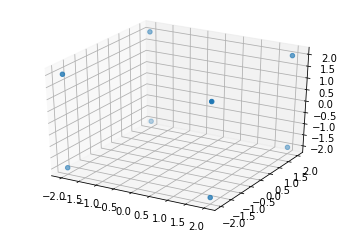

In [4]:
cubeViewer(vertex)

In [9]:
# Translation et rotation : préparer les matrices
# T : matrice de translation
Tx, Ty, Tz = [10, 2, 3]
T = np.array([[1, 0, 0, Tx],
             [0, 1, 0, Ty],
             [0, 0, 1, Tz],
             [0, 0, 0, 1]])

# R : matrice de rotation
a = 0
sina, cosa = np.sin(a), np.cos(a)

Rx = np.array([[1, 0, 0, 0],
              [0, cosa, -sina, 0],
              [0, sina, cosa, 0],
              [0, 0, 0, 1]])

b = np.pi/4
sinb, cosb = np.sin(b), np.cos(b)

Ry = np.array([[cosb, 0, sinb, 0],
              [0, 1, 0, 0],
              [-sinb, 0, cosb, 0],
              [0, 0, 0, 1]])

c = np.pi/6
sinc, cosc = np.sin(c), np.cos(c)

Rz = np.array([[cosc, -sinc, 0, 0],
              [sinc, cosc, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

Ryx = np.matmul(Ry, Rx)
R = np.matmul(Rz, Ryx)
TR = np.matmul(T, R)
print(TR)

[[ 0.61237244 -0.5         0.61237244 10.        ]
 [ 0.35355339  0.8660254   0.35355339  2.        ]
 [-0.70710678  0.          0.70710678  3.        ]
 [ 0.          0.          0.          1.        ]]


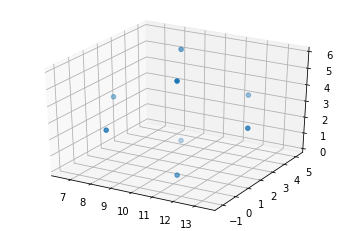

In [10]:
# Application de la matrice de transformation 
rows, _ = vertex.shape
vertexTR = np.array([np.matmul(TR, vertex[i,:]) for i in range(rows)])

# Visualisation
cubeViewer(vertexTR)